In [1]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import logging
LOG_FORMAT = "%(asctime)s [%(levelname)s] %(message)s"
DATE_FORMAT = "%Y-%m-%d %H:%M:%S"
logging.basicConfig(level=logging.INFO, format=LOG_FORMAT, datefmt=DATE_FORMAT)

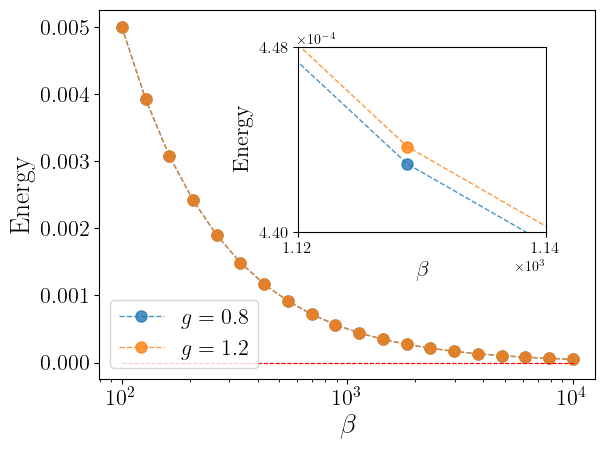

In [3]:
prefixPath = "../../Data/results/4/a1"
gList = [0.8, 1.2]
gamma = 0.0
eta = 0.0
nonLinearity = 'tanh'
colors = ["blue", "orange"]
ax = plt.gca().inset_axes([0.4, 0.4, 0.5, 0.5])
for g, c in zip(gList, colors):
    record = torch.load(prefixPath + f"/beta-g{g:.1f}-gamma{gamma:.1f}-bi100-bf10000-eta{eta:.1f}-{nonLinearity}.pt")
    betaList = record["beta"][:record["currentIndex"]+1]
    minusBetaFList = record["minusBetaF"]
    energyList = record["energy"]
    L2NormList = record["L2Norm"]
    QList = record["Qs"]
    entropyList = minusBetaFList + betaList * energyList

    # Plot curves
    plt.plot(betaList, energyList, marker="o", markersize=8, linestyle="--", linewidth=1, alpha=0.8, label="$g={}$".format(g))
    ax.plot(betaList, energyList, marker="o", markersize=8, linestyle="--", linewidth=1, alpha=0.8, label="$g={}$".format(g))
    plt.hlines(0, betaList[0], betaList[-1], linestyles="dashed", colors="r", linewidth=0.8)

plt.xlabel("$\\beta$", fontsize=20)
plt.ylabel("Energy", fontsize=20)
plt.xscale("log")
# plt.yscale("log")
plt.tick_params(labelsize=16)
plt.legend(loc="lower left", fontsize=16)

ax.ticklabel_format(axis="both", style="sci", scilimits=(-2, 1))
ax.set_xlim(1120, 1140)
ax.set_ylim(4.4e-4, 4.48e-4)
ax.set_xlabel("$\\beta$", fontsize=16)
ax.set_ylabel("Energy", fontsize=16)
ax.tick_params(labelsize=12)
ax.set_xticks([1120, 1140])
ax.set_yticks([4.4e-4, 4.48e-4])

# plt.savefig("../../Data/figures/fig2-energy.pdf".format(eta, nonLinearity), bbox_inches="tight")
plt.show()
plt.close()

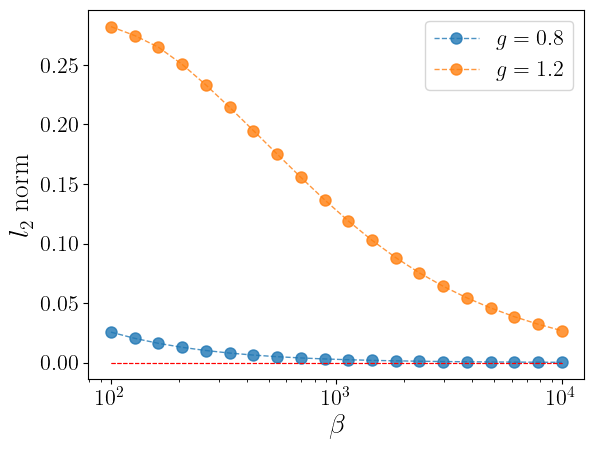

In [2]:
prefixPath = "../../Data/results/4/a1"
gList = [0.8, 1.2]
gamma = 0.0
eta = 0.0
nonLinearity = 'tanh'
colors = ["blue", "orange"]
for g, c in zip(gList, colors):
    record = torch.load(prefixPath + f"/beta-g{g:.1f}-gamma{gamma:.1f}-bi100-bf10000-eta{eta:.1f}-{nonLinearity}.pt")
    betaList = record["beta"][:record["currentIndex"]+1]
    minusBetaFList = record["minusBetaF"]
    energyList = record["energy"]
    L2NormList = record["L2Norm"]
    QList = record["Qs"]
    entropyList = minusBetaFList + betaList * energyList

    # Plot curves
    plt.plot(betaList, L2NormList, marker="o", markersize=8, linestyle="--", linewidth=1, alpha=0.8, label="$g={}$".format(g))
    plt.hlines(0, betaList[0], betaList[-1], linestyles="dashed", colors="r", linewidth=0.8)

plt.xlabel("$\\beta$", fontsize=20)
plt.ylabel("$l_2$ norm", fontsize=20)
plt.xscale("log")
# plt.yscale("log")
plt.tick_params(labelsize=16)
plt.legend(fontsize=16)

plt.savefig("../../Data/figures/fig2-l2norm.pdf".format(eta, nonLinearity), bbox_inches="tight")
plt.show()
plt.close()